In [13]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [14]:
data = pd.read_csv("survey_results_prepared.csv")

In [15]:
languages = data.columns[list(data.columns).index("APL"):]
data = data[data["Employment"].str.contains("Employed") == True]

In [16]:
agg_functions = ["std", "mean", "median", "count"]
aggregated = pd.DataFrame([], index=agg_functions)
for lang in languages:
    aggregated[lang] = data.loc[data[lang] == True, "CompTotal"].agg(agg_functions)

In [17]:
aggregated

,APL,Assembly,Bash/Shell,C,C#,C++,COBOL,Clojure,Crystal,Dart,...,R,Ruby,Rust,SAS,SQL,Scala,Solidity,Swift,TypeScript,VBA
std,640428.622344,714089.300654,702278.127100,755803.795044,643133.706352,736097.909655,861977.880183,670029.169296,596975.081487,953764.141082,...,755227.708657,754050.188041,675603.275337,609072.028770,765209.319228,951679.683763,765482.057658,829332.673191,748049.391086,746424.434298
mean,223899.009174,232822.873840,227516.412534,256041.749118,208411.603744,254152.308144,287150.782123,235627.735726,185953.197183,317239.976163,...,235126.631104,255707.005021,222146.420610,233488.017341,248443.460920,335476.251662,253832.768817,272191.649708,245850.245189,217021.681150
median,72000.000000,79463.000000,87000.000000,75000.000000,75000.000000,79000.000000,90000.000000,107000.000000,100000.000000,60000.000000,...,73000.000000,103500.000000,90000.000000,80000.000000,78000.000000,105000.000000,80000.000000,88000.000000,80000.000000,65000.000000
count,109.000000,1078.000000,11010.000000,4536.000000,10256.000000,5796.000000,179.000000,613.000000,142.000000,1762.000000,...,1331.000000,2589.000000,2853.000000,173.000000,18411.000000,1053.000000,372.000000,1710.000000,13822.000000,1496.000000


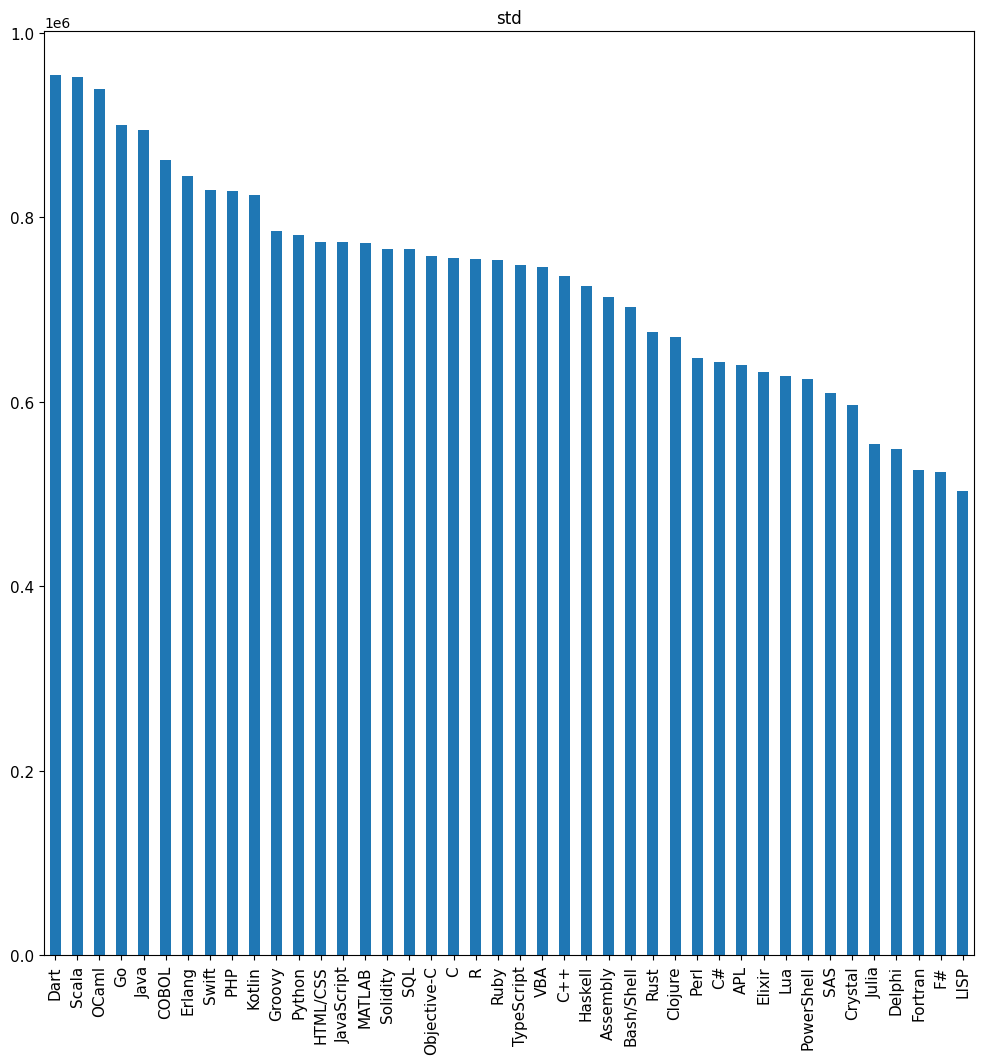

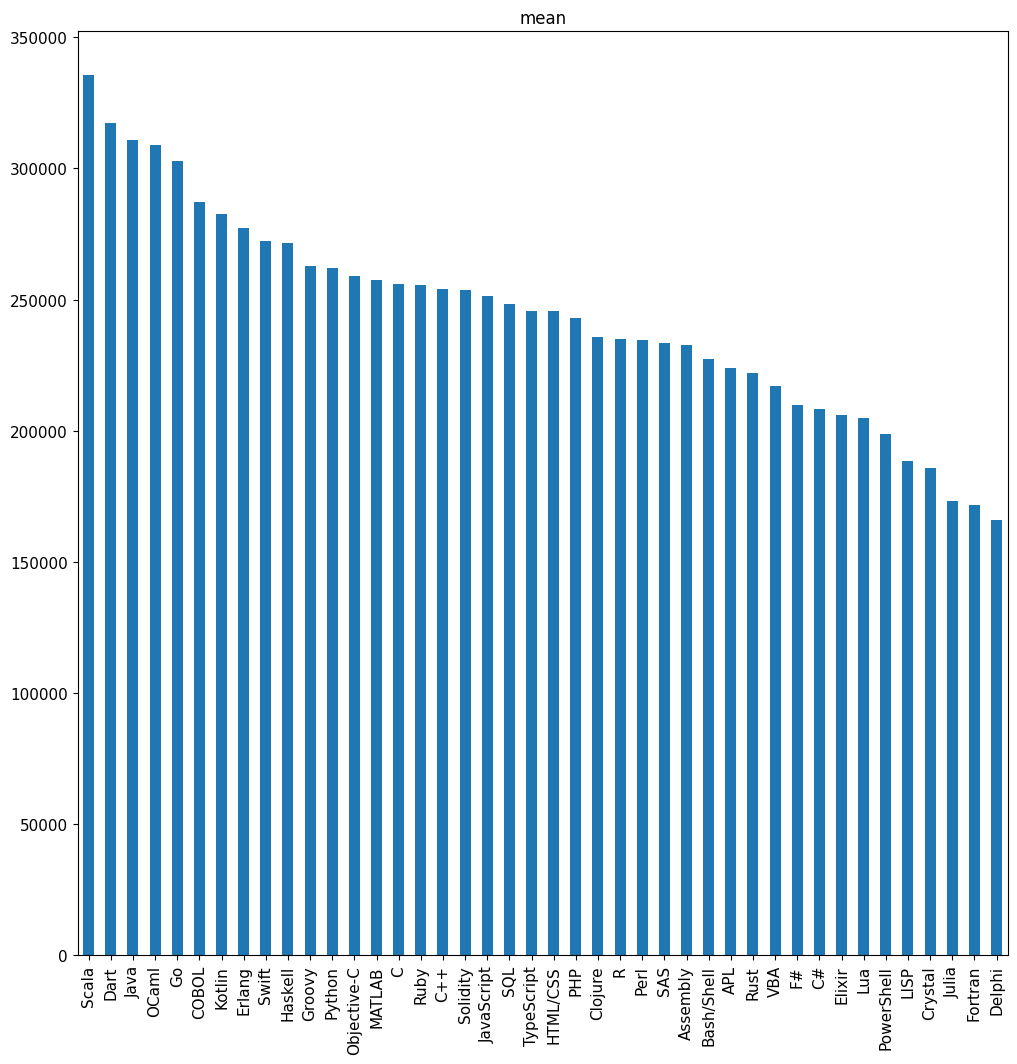

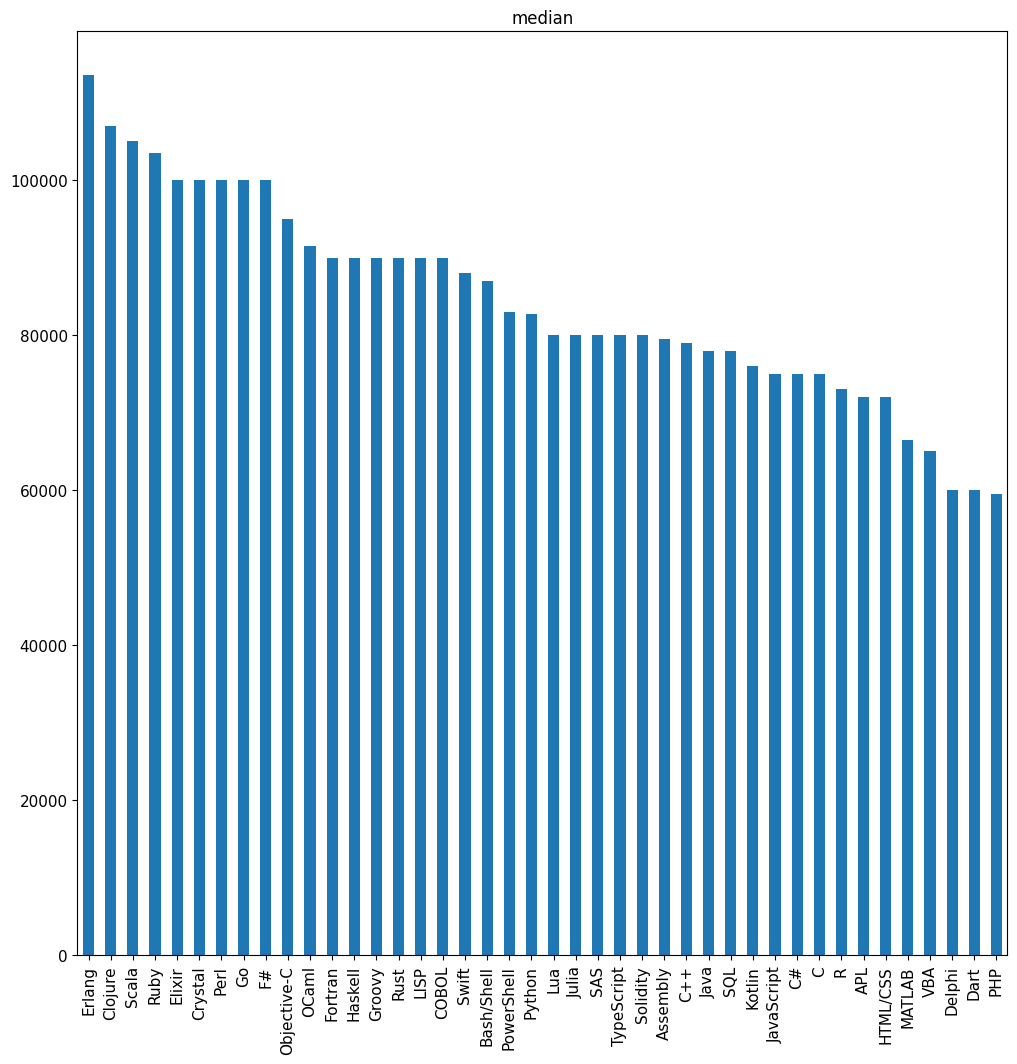

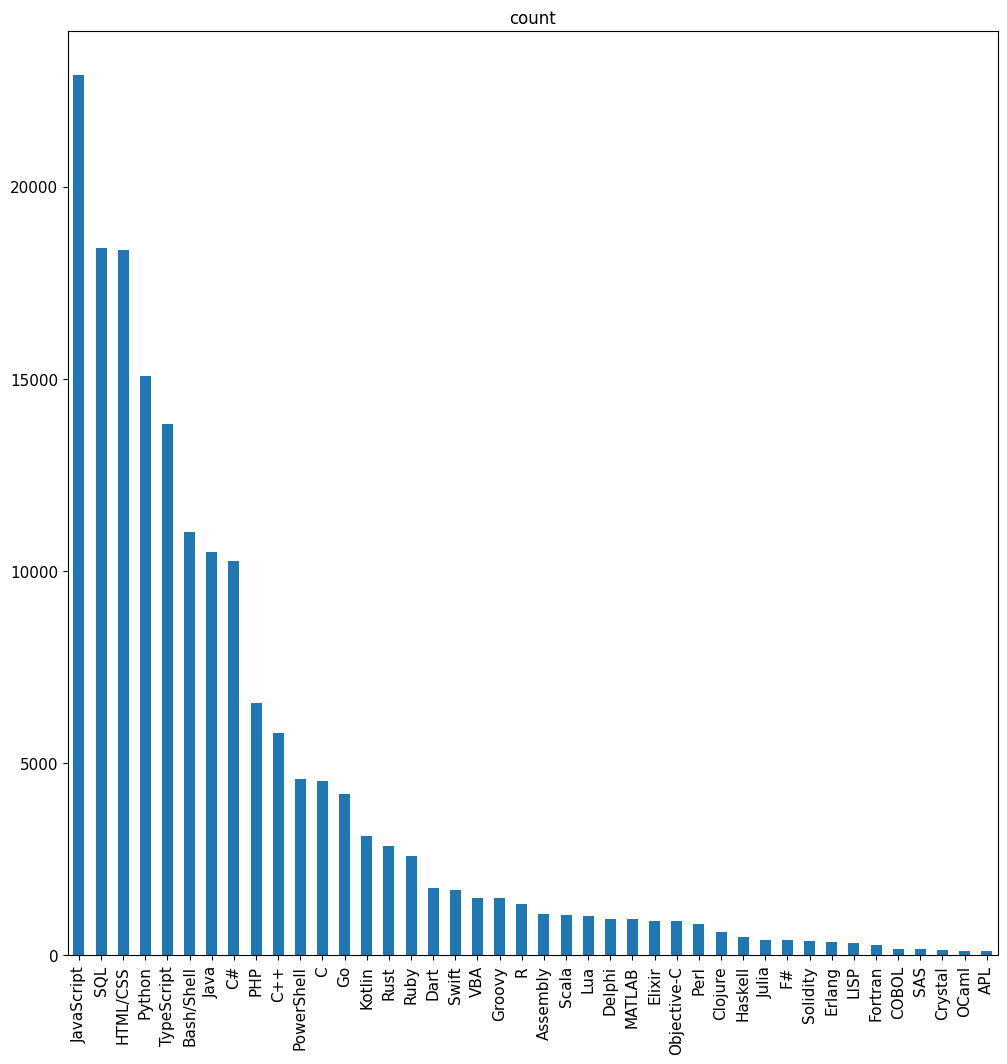

In [18]:
for agg_func in agg_functions:
    plt.figure(figsize=(12, 12))
    aggregated.loc[agg_func].sort_values(ascending=False).plot.bar(fontsize=11, title=agg_func)
    plt.savefig(f"graphs/salary_for_language/{agg_func}.png")